In [5]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape
import keras.backend as K
import math


#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs
import xmltodict

import imgaug as ia
from imgaug import augmenters as iaa
import math



import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,RepeatVector,Dot
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape,merge,Concatenate,Add,Dropout
import keras.backend as K
import math
from keras.activations import softmax,tanh
import tensorflow as tf
from keras.applications.vgg16 import VGG16


from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D,Softmax
from keras.preprocessing import sequence

In [6]:
class CustomModelCheckpoint(ModelCheckpoint):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            #self.model.save_weights(filepath, overwrite=True)
                            print("asd")
                            try:
                                with open(filepath,'wb') as f:
                                    pickle.dump(self.model.get_weights(),f)
                            except Exception as ex:
                                print("Could not write",ex)
                        else:
                            self.model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.model.save_weights(filepath, overwrite=True)
                else:
                    self.model.save(filepath, overwrite=True)
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + keras.backend.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + keras.backend.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+keras.backend.epsilon()))

In [7]:
# !pip install keras
#num_labels = len(np.unique(labels))

def iou_metric(y_true, y_pred):
    # iou as metric for bounding box regression
    # input must be as [x1, y1, x2, y2]
    
    # AOG = Area of Groundtruth box
    AoG = K.abs(K.transpose(y_true)[2] - K.transpose(y_true)[0] + 1) * K.abs(K.transpose(y_true)[3] - K.transpose(y_true)[1] + 1)
    
    # AOP = Area of Predicted box
    AoP = K.abs(K.transpose(y_pred)[2] - K.transpose(y_pred)[0] + 1) * K.abs(K.transpose(y_pred)[3] - K.transpose(y_pred)[1] + 1)

    # overlaps are the co-ordinates of intersection box
    overlap_0 = K.maximum(K.transpose(y_true)[0], K.transpose(y_pred)[0])
    overlap_1 = K.maximum(K.transpose(y_true)[1], K.transpose(y_pred)[1])
    overlap_2 = K.minimum(K.transpose(y_true)[2], K.transpose(y_pred)[2])
    overlap_3 = K.minimum(K.transpose(y_true)[3], K.transpose(y_pred)[3])

    # intersection area
    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)

    # area of union of both boxes
    union = AoG + AoP - intersection
    
    # iou calculation
    iou = intersection / union

    # bounding values of iou to (0,1)
    iou = K.clip(iou, 0.0 + K.epsilon(), 1.0 - K.epsilon())

    return iou    

In [8]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5364525918287504151, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 114774955951040728
 physical_device_desc: "device: XLA_CPU device"]

In [5]:
def process_image_keypoints(img,bbox_coords):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    bbox_coordinates = []
    for a,b in bbox_coords:
        a = float(a)*ratio
        b = float(b)*ratio
        bbox_coordinates.append([a+left,b+top])
    return new_im,bbox_coordinates

In [6]:
def process_image_keypoints_nobox(img):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im,[left,top,ratio]

In [7]:
def process_image_keypoints_nobox2(img):
    desired_size = 448

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im,[left,top,ratio]

In [8]:
count_correct = 0
count_wrong = 0
images = []
bboxes = []
image_sizes = []
image_names = []
for file in os.listdir("/tf/data/tail-annotations/"):
    try:
        with open('/tf/data/tail-annotations/'+file,'r') as f:
            text = f.read()
            d = xmltodict.parse(text)
        path = d['annotation']['path']
        rel_path = "/home/parmeet1992/Pictures/"
        
        path = path.split(rel_path)[1]
        path = "/tf/data/" + path
        bgr_img = cv2.imread(path)
        img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        
        obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
        bbox = obj['bndbox']                
        bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]


        img,bbox_coords = process_image_keypoints(img,bbox_coords)
        bbs = ia.BoundingBoxesOnImage([
            ia.BoundingBox(x1=bbox_coords[0][0], y1=bbox_coords[0][1], x2=bbox_coords[1][0], y2=bbox_coords[1][1])
        ], shape=img.shape)

        images.append(img)
        bboxes.append(bbs)
        count_correct += 1
    except Exception as ex:
        print(ex)
        count_wrong += 1

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



KeyboardInterrupt: 

In [ ]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        sometimes(iaa.Affine(
            translate_percent={"x": (-0.02, 0.02), "y": (-0.02, 0.02)}, # translate by -20 to +20 percent (per axis)
            rotate=(-5, 5), # rotate by -45 to +45 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        iaa.SomeOf((0, 5),
            [
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [ ]:
def augment_images(images,bboxes,times):
    all_bboxes = []
    
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    all_images = list(images)
    
    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    #print(len(all_images))
    #print(len(all_bboxes))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        
        all_images = all_images + list(image_aug)
        #all_image_sizes = all_image_sizes + list(image_sizes)
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_bboxes

In [10]:
X_normalized = [(x[:,:,:].astype(np.float64)) / 255.0 for x in images]
X_train, X_test, y_train, y_test = train_test_split(X_normalized,bboxes,test_size=0.15,random_state=42,shuffle=True)
test_bboxes = []
for bbs in list(y_test):
    test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
train_images,train_bboxes = augment_images(X_train,y_train,4)

NameError: name 'images' is not defined

In [9]:
labels

NameError: name 'labels' is not defined

In [6]:
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False

x = cnn_base.get_layer('block5_pool').output
x = Conv2D(512, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(512, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(4, kernel_size=(1, 1), padding="same")(x)
x = Reshape((4,),name='localization_output')(x)


model = Model(inputs=cnn_base.input, outputs=x)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy',iou_metric])
initial_weights = model.get_weights()

W0523 21:37:54.878676 139870429062912 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/training/moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0523 21:37:54.933992 139870429062912 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [250]:
try:
    with open('vgg16-tail-box-weights11.hd5','rb') as f:
        model_weights = pickle.load(f)
        model.set_weights(model_weights)
        print("loaded weights")
except:
    print("not present")
checkpoint = CustomModelCheckpoint('vgg16-tail-box-weights11.hd5', monitor='val_iou_metric', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
callbacks_list = [checkpoint]
history = model.fit(np.array(train_images),np.array(train_bboxes),validation_data=(np.array(X_test),np.array(test_bboxes)),epochs=40,batch_size=5,callbacks=callbacks_list)

loaded weights


NameError: name 'train_bboxes' is not defined

In [10]:
with open('vgg16-tail-box-weights11.hd5','rb') as f:
    model_weights = pickle.load(f)
    model.set_weights(model_weights)
    print("loaded weights")

loaded weights


In [11]:
df = pd.read_csv('/tf/data/labels.csv')

labels_dict = {}

for idx,row in df.iterrows():
    labels_dict[row['id']] = row['tail']

In [12]:
count_correct = 0
count_wrong = 0
images = []
labels = []
image_sizes = []
image_names = []

folders = ['/tf/data/tail-views/tangier_visit2_dslr','/tf/data/tail-views/tangier-visit2']
for folder in folders:
    for file in os.listdir(folder):
        try:
            bgr_img = cv2.imread(folder+"/"+file)
            
            img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
            img_temp,corr = process_image_keypoints_nobox(img)
            img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
            label = file.split(".")[0].split("_")[0]
            
            [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
            [left,top,ratio] = corr
            xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
            ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            
            
            img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
            image_temp,_= process_image_keypoints_nobox(img)
            if not math.isnan(int(label)) and int(label) in labels_dict:
                images.append(image_temp)
                labels.append(int(labels_dict[int(label)]))
            count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

In [14]:
with open('data-tail0.pckl','rb') as file:
    train_images,train_labels,test_images,test_labels = pickle.load(file)

In [22]:
len(test_labels)

74

In [263]:
def augment_images(images,labels,times):
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    
    all_images = list(images)
    all_labels = list(labels)
    
    
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels)        
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_labels

In [264]:
images_temp = [(x[:,:,:] / 255.0).astype(np.float64) for x in images]

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=100,)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images_temp,labels):
    i = i + 1
    print(i)
    train_images,train_labels = augment_images(np.array(images_temp)[train],np.array(labels)[train],1)
    kfold_data.append([train_images,train_labels,np.array(images_temp)[test],np.array(labels)[test]])

1
2
3
4
5


In [265]:
with open('data-tail0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-tail1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-tail2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-tail3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-tail4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [7]:
def attention_block(x,K,labels,w,h):
    H = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    H = BatchNormalization()(H)
    spatial_softmax = Lambda(lambda x:softmax(H,axis=3))(H)
    O = Conv2D(labels*K, kernel_size=(w, h), padding="same")(x)
    O = BatchNormalization()(O)
    rH = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=3))(spatial_softmax)
    o = Lambda(lambda x: tf.einsum('bijk,bijk->bk',x[0],x[1]))([O,rH])
    tempH = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    tempH = BatchNormalization()(tempH)
    gh = Lambda(lambda x: softmax(tanh(tf.einsum('bijk,bijk->bk',x[0],x[1])),axis=1))([tempH,spatial_softmax])
    rgh = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=1))(gh)
    of = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([rgh,o])
    new_shape = Reshape((labels,K))(of)
    out = Lambda(lambda x: keras.backend.sum(x,axis=2))(new_shape)
    out = BatchNormalization()(out)
    out = Dense(labels,activation='softmax')(out)
    #x = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    #inter = Lambda(lambda x: Flatten()(keras.backend.mean(x,axis=3)))(x)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(x)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(inter)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    print(inter.shape)
    inter = Conv2D(1, kernel_size=(w, h), padding="same")(inter)
    inter = Flatten()(inter)
    weight = Dense(labels,activation='tanh')(inter)
    return out,weight

In [12]:
K = 5
labels = 3
w,h = 3,3

cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False


x = cnn_base.get_layer('block3_conv3').output
final1,weight1 = attention_block(x,K,labels,w,h)
#final1 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final1,weight1])

x = cnn_base.get_layer('block4_conv3').output
final2,weight2 = attention_block(x,K,labels,w,h)

#final2 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final2,weight2])

x = cnn_base.get_layer('block5_pool').output
inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
weight3 = Dense(labels,activation='tanh')(inter)

x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(labels,activation='softmax')(x)


weight_concat = Concatenate()([weight1,weight2,weight3])
print(weight_concat.shape)
weight_concat = Reshape((labels,3))(weight_concat)
weight_concat = Softmax(axis=2)(weight_concat)

final = Concatenate()([final1,final2,x])
final = Reshape((labels,3))(final)


sum_final = Lambda(lambda x: tf.einsum('bij,bij->bij',x[0],x[1]))([weight_concat,final])
sum_final = Lambda(lambda x: keras.backend.sum(x,axis=2))(sum_final)
sum_final = Dense(labels,activation='softmax')(sum_final)

model = Model(inputs=cnn_base.input, outputs=sum_final)

# sgd = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=['sparse_categorical_accuracy'])
print(model.summary())
initial_weights = model.get_weights()

(?, 14, 14, 128)
(?, 7, 7, 128)
(?, 9)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________

In [34]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []

for i in range(5):
    if i==0 or i==1:
        eps = 0
    else:
        eps = 150
    print("Loading file")
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('tail-classification-adam-0001-tanh-batch0'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
    from keras.callbacks import EarlyStopping
    earlyStopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0001, patience=70, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    checkpoint = CustomModelCheckpoint('tail-classification-adam-0001-relu-dropout0.2'+str(i)+'.hd5', monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    callbacks_list = [checkpoint,earlyStopping]
    
    print("calculating initial losses")
    #initial_train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
    #initial_test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
    
    
    history = model.fit(x=np.array(train_images),y=np.array(train_labels),batch_size=20,epochs=eps,
                           validation_data=(np.array(test_images),np.array(test_labels)),callbacks=callbacks_list,
                       class_weight=class_weights)
    history_record.append(history)
    #train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
    #test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
    #train_scores.append(train_score)
    #test_scores.append(test_score)
    
    #initial_train_scores.append(train_score)
    #initial_test_scores.append(test_score)
    
    #print("predicting")
    #print("Test Score",test_score)
    #train_predictions = model.predict(x=np.array(train_images),batch_size=50)
    #test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
    #train_pred.append(train_predictions)
    #test_pred.append(test_predictions)

Loading file
loaded model
loaded
calculating initial losses
Train on 586 samples, validate on 74 samples
Loading file
loaded model
loaded
calculating initial losses
Train on 586 samples, validate on 74 samples
Epoch 1/150
586/586 [==============================] - 10s 18ms/step - loss: 0.9288 - sparse_categorical_accuracy: 0.4915 - val_loss: 1.0054 - val_sparse_categorical_accuracy: 0.3919

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.39189, saving model to tail-classification-adam-0001-relu-dropout0.21.hd5
asd
Epoch 2/150
586/586 [==============================] - 11s 18ms/step - loss: 0.9261 - sparse_categorical_accuracy: 0.5068 - val_loss: 0.9971 - val_sparse_categorical_accuracy: 0.4324

Epoch 00002: val_sparse_categorical_accuracy improved from 0.39189 to 0.43243, saving model to tail-classification-adam-0001-relu-dropout0.21.hd5
asd
Epoch 3/150
586/586 [==============================] - 11s 18ms/step - loss: 0.9219 - sparse_categorical_accuracy: 0.5102 - v


Epoch 00029: val_sparse_categorical_accuracy improved from 0.72973 to 0.74324, saving model to tail-classification-adam-0001-relu-dropout0.21.hd5
asd
Epoch 30/150
586/586 [==============================] - 10s 18ms/step - loss: 0.8339 - sparse_categorical_accuracy: 0.8020 - val_loss: 0.9222 - val_sparse_categorical_accuracy: 0.6757

Epoch 00030: val_sparse_categorical_accuracy did not improve from 0.74324
Epoch 31/150
586/586 [==============================] - 10s 17ms/step - loss: 0.8315 - sparse_categorical_accuracy: 0.8123 - val_loss: 0.9161 - val_sparse_categorical_accuracy: 0.7297

Epoch 00031: val_sparse_categorical_accuracy did not improve from 0.74324
Epoch 32/150
586/586 [==============================] - 10s 17ms/step - loss: 0.8289 - sparse_categorical_accuracy: 0.8174 - val_loss: 0.9290 - val_sparse_categorical_accuracy: 0.6351

Epoch 00032: val_sparse_categorical_accuracy did not improve from 0.74324
Epoch 33/150
586/586 [==============================] - 10s 17ms/step - 


Epoch 00060: val_sparse_categorical_accuracy did not improve from 0.81081
Epoch 61/150
586/586 [==============================] - 10s 17ms/step - loss: 0.7686 - sparse_categorical_accuracy: 0.8362 - val_loss: 0.8664 - val_sparse_categorical_accuracy: 0.7838

Epoch 00061: val_sparse_categorical_accuracy did not improve from 0.81081
Epoch 62/150
586/586 [==============================] - 10s 17ms/step - loss: 0.7658 - sparse_categorical_accuracy: 0.8362 - val_loss: 0.8493 - val_sparse_categorical_accuracy: 0.7973

Epoch 00062: val_sparse_categorical_accuracy did not improve from 0.81081
Epoch 63/150
586/586 [==============================] - 10s 17ms/step - loss: 0.7602 - sparse_categorical_accuracy: 0.8413 - val_loss: 0.8684 - val_sparse_categorical_accuracy: 0.7838

Epoch 00063: val_sparse_categorical_accuracy did not improve from 0.81081
Epoch 64/150
586/586 [==============================] - 10s 18ms/step - loss: 0.7580 - sparse_categorical_accuracy: 0.8379 - val_loss: 0.8478 - val_

KeyboardInterrupt: 

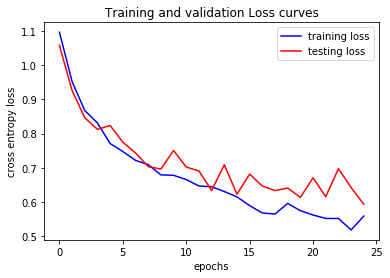

In [25]:
plt.plot(history_record[3].history['loss'],color='b',label='training loss')
plt.plot(history_record[3].history['val_loss'],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('tail-loss-attention.jpg')
plt.show()

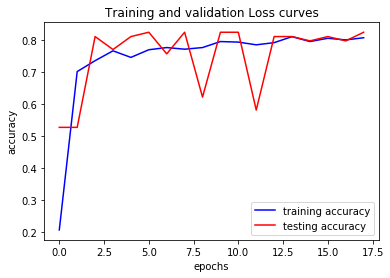

In [26]:
plt.plot(history_record[1].history['sparse_categorical_accuracy'],color='b',label='training accuracy')
plt.plot(history_record[1].history['val_sparse_categorical_accuracy'],color='r',label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('tail-accuracy-attention.jpg')
plt.show()

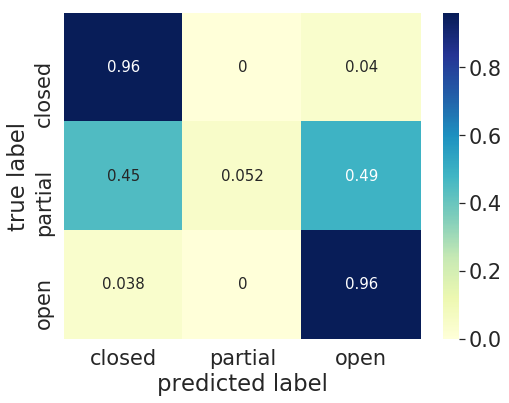

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.9)

C_sum = np.zeros(3)

# for i in range(5):
#     with open('data-tail'+str(i)+'.pckl','rb') as file:
#         train_images,train_labels,test_images,test_labels = pickle.load(file)
#     with open('tail-classification28'+str(i)+'.hd5','rb') as f:
#         model_weights = pickle.load(f)
#         print("loaded model")
#     model.set_weights(model_weights)
#     #test_predictions = test_pred[i]
# #test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
# #test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))

# #train_predictions = model.predict(x=np.array(train_images),batch_size=5)
# # train_predictions = np.argmax(train_pred[i],axis=1)
# # train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
# # train_accuracy.append(accuracy_score(train_labels,train_predictions))
#     test_predictions = model.predict(x=np.array(test_images),batch_size=5)
#     C = confusion_matrix(np.array(test_labels), np.argmax(test_predictions,axis=1))
#     C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(3,1)
# confusion_matrix = C_sum/5

confusion_matrix = [[0.96,0,0.04],[0.45,0.052,0.49],[0.038,0,0.96]]

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['closed','partial','open'], 
                     columns = ['closed','partial','open'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.savefig('tail-confusion-matrix-attention.jpg')
plt.show()

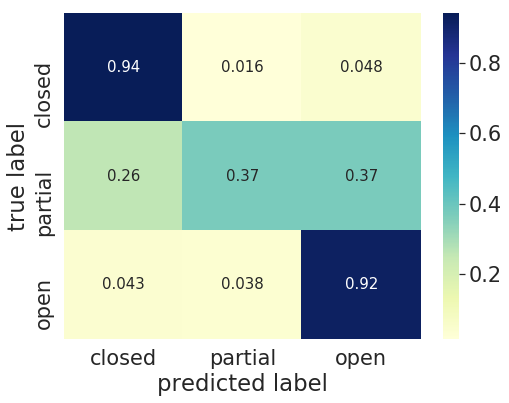

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.9)

C_sum = np.zeros(3)

# for i in range(5):
#     with open('data-tail'+str(i)+'.pckl','rb') as file:
#         train_images,train_labels,test_images,test_labels = pickle.load(file)
#     with open('tail-classification28'+str(i)+'.hd5','rb') as f:
#         model_weights = pickle.load(f)
#         print("loaded model")
#     model.set_weights(model_weights)
#     #test_predictions = test_pred[i]
# #test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
# #test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))

# #train_predictions = model.predict(x=np.array(train_images),batch_size=5)
# # train_predictions = np.argmax(train_pred[i],axis=1)
# # train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
# # train_accuracy.append(accuracy_score(train_labels,train_predictions))
#     test_predictions = model.predict(x=np.array(test_images),batch_size=5)
#     C = confusion_matrix(np.array(test_labels), np.argmax(test_predictions,axis=1))
#     C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(3,1)
# confusion_matrix = C_sum/5

confusion_matrix = [[0.94,0.016,0.048],[0.26,0.37,0.37],[0.043,0.038,0.92]]

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['closed','partial','open'], 
                     columns = ['closed','partial','open'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.savefig('tail-confusion-matrix.jpg')
plt.show()

In [11]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(2):
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('tail-classification-adam-01-tanh-batch'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    test_predictions = model.predict(x=np.array(test_images),batch_size=5)
    test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
    test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))
    
    #train_predictions = model.predict(x=np.array(train_images),batch_size=5)
#     train_predictions = np.argmax(train_pred[i],axis=1)
#     train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
#     train_accuracy.append(accuracy_score(train_labels,train_predictions))

loaded model


ValueError: Shapes must be equal rank, but are 2 and 1 for 'Assign_119' (op: 'Assign') with input shapes: [64,64], [64].

In [36]:
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.std(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.std(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.std(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.std(test_f1))

Training accuracy mean nan
Training accuracy var nan
Testing accuracy mean 0.7905405405405406
Testing accuracy var 0.020270270270270285
Training f1 mean nan
Training f1 var nan
Testing f1 mean 0.6301614725144138
Testing f1 var 0.04163888399182519


In [295]:
means = [0.7746,0.76885,0.78595,0.79413,0.7917]
variances = [0.02476, 0.03282,0.03237,0.022948,0.028]
plt.errorbar([1,3,5,7,9],means,variances,label='Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("Number of attention heads K")
plt.ylabel("Test accuracy")
plt.grid()
plt.savefig('tail-choose-attention-headk.jpg')
plt.show()

[0.9744027303754266,
 0.9795221843003413,
 0.9829931972789115,
 0.9914965986394558,
 0.9880952380952381]

In [ ]:
means = [0.771040,0.765217,0.7816814,0.793239,0.79058]
variances = [0.02689,0.03282,0.0354808,0.022948,0.028138]
plt.errorbar([1,3,5,7,9],means,variances,label='Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("Number of attention heads K")
plt.ylabel("F1 Test accuracy")
plt.grid()
plt.savefig('tail-choose-attention-headk-f1.jpg')
plt.show()

In [8]:
labels = 3
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False
x = cnn_base.get_layer('block5_pool').output
x = Flatten()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(labels,activation='softmax')(x)


model = Model(inputs=cnn_base.input, outputs=x)

sgd = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=['sparse_categorical_accuracy'])
print(model.summary())
initial_weights = model.get_weights()

W0524 00:59:37.334249 139817683412736 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/training/moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [14]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []

for i in range(5):
    print("Loading file")
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('tail-classification-simple-final'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
    from keras.callbacks import EarlyStopping
    earlyStopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.001, patience=12, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    checkpoint = CustomModelCheckpoint('tail-classification-simple-final'+str(i)+'.hd5', monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    callbacks_list = [checkpoint,earlyStopping]
    
    print("calculating initial losses")
    initial_train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
    initial_test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
    
    
    history = model.fit(x=np.array(train_images),y=np.array(train_labels),batch_size=8,epochs=40,
                           validation_data=(np.array(test_images),np.array(test_labels)),callbacks=callbacks_list,
                       class_weight=class_weights)
#     history_record.append(history)
#     train_score = model.evaluate(x=np.array(train_images),y=np.array(train_labels),batch_size=5)
#     test_score = model.evaluate(x=np.array(test_images),y=np.array(test_labels),batch_size=5)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
    
#     initial_train_scores.append(train_score)
#     initial_test_scores.append(test_score)
    
#     print("predicting")
#     print("Test Score",test_score)
#     train_predictions = model.predict(x=np.array(train_images),batch_size=50)
#     test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
#     train_pred.append(train_predictions)
#     test_pred.append(test_predictions)

Loading file
setting initial weights
loaded
calculating initial losses
74/74 [==============================] - 2s 22ms/step
Train on 586 samples, validate on 74 samples
Epoch 1/40
586/586 [==============================] - 10s 17ms/step - loss: 1.1523 - sparse_categorical_accuracy: 0.4898 - val_loss: 0.9315 - val_sparse_categorical_accuracy: 0.5135

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.51351, saving model to tail-classification-simple-final0.hd5
asd
Epoch 2/40
586/586 [==============================] - 8s 13ms/step - loss: 1.0152 - sparse_categorical_accuracy: 0.5273 - val_loss: 0.7967 - val_sparse_categorical_accuracy: 0.6892

Epoch 00002: val_sparse_categorical_accuracy improved from 0.51351 to 0.68919, saving model to tail-classification-simple-final0.hd5
asd
Epoch 3/40
586/586 [==============================] - 8s 13ms/step - loss: 0.8966 - sparse_categorical_accuracy: 0.6416 - val_loss: 0.7099 - val_sparse_categorical_accuracy: 0.7432

Epoch 00003:

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(1):
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('tail-classification-simple-final'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    test_predictions =  model.predict(x=np.array(test_images),batch_size=5)
    test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
    test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))
    
#     #train_predictions = model.predict(x=np.array(train_images),batch_size=5)
#     train_predictions = np.argmax(train_pred[i],axis=1)
#     #train_predictions = np.argmax(train_predictions,axis=1)
#     train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
#     train_accuracy.append(accuracy_score(train_labels,train_predictions))

In [31]:
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.var(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.var(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.var(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.var(test_f1))
print(len(test_predictions))
print(len(test_labels))

Training accuracy mean nan
Training accuracy var nan
Testing accuracy mean 0.7972972972972973
Testing accuracy var 0.0
Training f1 mean nan
Training f1 var nan
Testing f1 mean 0.5817286162113748
Testing f1 var 0.0
74
74


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
#labs = []
# for i in (np.argmax(test_predictions,axis=1)):
#     labs.append(i[0])
idx = 0
for a,b in zip(np.argmax(test_predictions,axis=1),test_labels):
    idx = idx + 1
    if a!=b:
        print(a,",",b,'',idx)
        #print(idx)

0 , 1  3
2 , 1  7
2 , 1  10
2 , 1  11
0 , 1  12
0 , 2  13
2 , 1  29
0 , 2  34
2 , 1  35
2 , 1  37
0 , 1  38
0 , 1  45
0 , 1  51
0 , 1  52
1 , 2  63


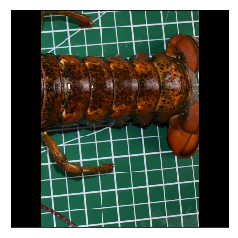

In [51]:
idx = 37
plt.imshow(test_images[idx])
plt.xticks([])
plt.yticks([])
plt.savefig("tail_incorrect_partial3.jpg")

In [37]:
plt.plot([initial_train_scores[0][0]] + history.history['loss'],color='b')
plt.plot([initial_test_scores[0][0]] + history.history['val_loss'],color='r')

IndexError: list index out of range

loaded model
loaded model
loaded model
loaded model
loaded model


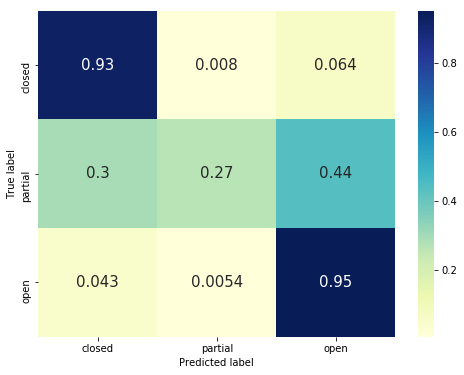

In [11]:
from sklearn.metrics import confusion_matrix

C_sum = np.zeros(3)

for i in range(5):
    with open('data-tail'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('tail-classification-simple11'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
#test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
#test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))

#train_predictions = model.predict(x=np.array(train_images),batch_size=5)
# train_predictions = np.argmax(train_pred[i],axis=1)
# train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
# train_accuracy.append(accuracy_score(train_labels,train_predictions))
    test_predictions = model.predict(x=np.array(test_images),batch_size=5)
    C = confusion_matrix(np.array(test_labels), np.argmax(test_predictions,axis=1))
    C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(3,1)
confusion_matrix = C_sum/5

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['closed','partial','open'], 
                     columns = ['closed','partial','open'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('tail-confusion-matrix.jpg')
plt.show()